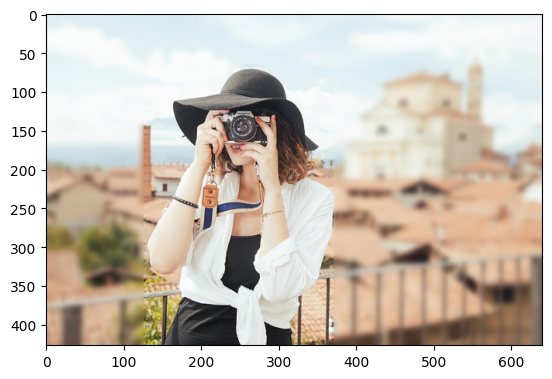

In [5]:
import cv2
import numpy as np

# YOLO 모델 파일 및 구성 파일 설정
yolo_cfg = 'yolov4.cfg'
yolo_weights = 'yolov4.weights'
yolo_names = 'coco.names'

# COCO 클래스 이름 로드
with open(yolo_names, 'r') as f:
    classes = f.read().splitlines()

# 네트워크 모델 불러오기
net = cv2.dnn.readNetFromDarknet(yolo_cfg, yolo_weights)
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# 이미지 로드
input_image_path = r'C:\Data\Sample\IMG\Human_Target\photographer-407068_640.jpg'
output_image_path = 'output_blurred_background.jpg'
img = cv2.imread(input_image_path)
height, width, channels = img.shape

# 사람 탐지
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# 탐지된 객체의 정보를 저장할 리스트
class_ids = []
confidences = []
boxes = []

# 탐지된 객체 분석
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if class_id == classes.index("person") and confidence > 0.5:
            # 탐지된 객체의 바운딩 박스 좌표 계산
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Non-maximum suppression을 이용한 중복 박스 제거
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# 사람 영역을 마스크로 생성
mask = np.zeros((height, width), dtype=np.uint8)

for i in indices:
    x, y, w, h = boxes[i]
    mask[y:y+h, x:x+w] = 255

# 마스크를 활용해 사람 영역을 제외한 영역에 블러 효과 적용
blurred_img = cv2.GaussianBlur(img, (21, 21), 0)
output_img = np.where(mask[:, :, np.newaxis] == 255, img, blurred_img)

# 결과 이미지 저장
cv2.imwrite(output_image_path, output_img)

import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.show()

# # 결과 이미지 출력
# cv2.imshow('Blurred Background', output_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [6]:
import cv2
import numpy as np
import os

# YOLO 모델 파일 및 구성 파일 설정
yolo_cfg = 'yolov4.cfg'
yolo_weights = 'yolov4.weights'
yolo_names = 'coco.names'

# COCO 클래스 이름 로드
with open(yolo_names, 'r') as f:
    classes = f.read().splitlines()

# 네트워크 모델 불러오기
net = cv2.dnn.readNetFromDarknet(yolo_cfg, yolo_weights)
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# 폴더 설정
input_folder = r'C:\Data\Sample\IMG\Human_Target'
output_folder = r'C:\Data\Sample\IMG\Human_Result'

for file in os.listdir(input_folder):
    # 이미지 로드
    input_image_path = os.path.join(input_folder, file)
    output_image_path = os.path.join(output_folder, file)

    img = cv2.imread(input_image_path)
    height, width, channels = img.shape

    # 사람 탐지
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # 탐지된 객체의 정보를 저장할 리스트
    class_ids = []
    confidences = []
    boxes = []

    # 탐지된 객체 분석
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if class_id == classes.index("person") and confidence > 0.5:
                # 탐지된 객체의 바운딩 박스 좌표 계산
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Non-maximum suppression을 이용한 중복 박스 제거
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # 사람 영역을 마스크로 생성
    mask = np.zeros((height, width), dtype=np.uint8)

    for i in indices:
        x, y, w, h = boxes[i]
        mask[y:y+h, x:x+w] = 255

    # 마스크를 활용해 사람 영역을 제외한 영역에 블러 효과 적용
    blurred_img = cv2.GaussianBlur(img, (21, 21), 0)
    output_img = np.where(mask[:, :, np.newaxis] == 255, img, blurred_img)

    # 결과 이미지 저장
    cv2.imwrite(output_image_path, output_img)

    # import matplotlib.pyplot as plt
    # plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
    # plt.show()

# # 결과 이미지 출력
# cv2.imshow('Blurred Background', output_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


<>:19: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\D'
C:\Users\550sn\AppData\Local\Temp\ipykernel_11240\1747446349.py:19: SyntaxWarning: invalid escape sequence '\D'
  input_image_path = 'C:\Data\Sample\IMG\Human_Target\photographer-407068_640.jpg'


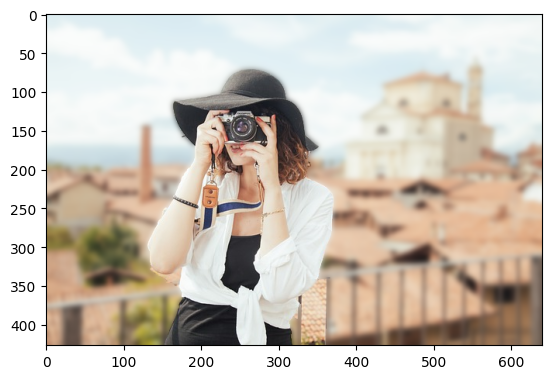

In [8]:
import cv2
import numpy as np

# YOLO 모델 파일 및 구성 파일 설정
yolo_cfg = 'yolov4.cfg'
yolo_weights = 'yolov4.weights'
yolo_names = 'coco.names'

# COCO 클래스 이름 로드
with open(yolo_names, 'r') as f:
    classes = f.read().splitlines()

# 네트워크 모델 불러오기
net = cv2.dnn.readNetFromDarknet(yolo_cfg, yolo_weights)
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# 이미지 로드
input_image_path = 'C:\Data\Sample\IMG\Human_Target\photographer-407068_640.jpg'
output_image_path = 'output_segmented.jpg'
img = cv2.imread(input_image_path)
height, width, channels = img.shape

# 사람 탐지
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# 탐지된 객체의 정보를 저장할 리스트
class_ids = []
confidences = []
boxes = []

# 탐지된 객체 분석
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if class_id == classes.index("person") and confidence > 0.5:
            # 탐지된 객체의 바운딩 박스 좌표 계산
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Non-maximum suppression을 이용한 중복 박스 제거
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# 사람 영역을 따라 마스크 생성
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

for i in indices:
    x, y, w, h = boxes[i]
    rect = (x, y, w, h)
    cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# 확실한 배경과 확실한 전경 픽셀을 0 또는 1로 변경
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img_fg = img * mask2[:, :, np.newaxis]

# 마스크를 활용해 사람 영역을 제외한 영역에 블러 효과 적용
blurred_img = cv2.GaussianBlur(img, (21, 21), 0)
output_img = np.where(mask2[:, :, np.newaxis] == 1, img, blurred_img)

# 결과 이미지 저장
cv2.imwrite(output_image_path, output_img)

# # 결과 이미지 출력
# cv2.imshow('Segmented Output', output_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.show()



In [9]:
import cv2
import numpy as np

# YOLO 모델 파일 및 구성 파일 설정
yolo_cfg = 'yolov4.cfg'
yolo_weights = 'yolov4.weights'
yolo_names = 'coco.names'

# COCO 클래스 이름 로드
with open(yolo_names, 'r') as f:
    classes = f.read().splitlines()

# 네트워크 모델 불러오기
net = cv2.dnn.readNetFromDarknet(yolo_cfg, yolo_weights)
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]


# 폴더 설정
input_folder = r'C:\Data\Sample\IMG\Human_Target'
output_folder = r'C:\Data\Sample\IMG\Human_Result'

for file in os.listdir(input_folder):
    # 이미지 로드
    input_image_path = os.path.join(input_folder, file)
    output_image_path = os.path.join(output_folder, file)
    img = cv2.imread(input_image_path)
    height, width, channels = img.shape

    # 사람 탐지
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # 탐지된 객체의 정보를 저장할 리스트
    class_ids = []
    confidences = []
    boxes = []

    # 탐지된 객체 분석
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if class_id == classes.index("person") and confidence > 0.5:
                # 탐지된 객체의 바운딩 박스 좌표 계산
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Non-maximum suppression을 이용한 중복 박스 제거
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # 사람 영역을 따라 마스크 생성
    mask = np.zeros(img.shape[:2], np.uint8)
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    for i in indices:
        x, y, w, h = boxes[i]
        rect = (x, y, w, h)
        cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

    # 확실한 배경과 확실한 전경 픽셀을 0 또는 1로 변경
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    img_fg = img * mask2[:, :, np.newaxis]

    # 마스크를 활용해 사람 영역을 제외한 영역에 블러 효과 적용
    blurred_img = cv2.GaussianBlur(img, (21, 21), 0)
    output_img = np.where(mask2[:, :, np.newaxis] == 1, img, blurred_img)

    # 결과 이미지 저장
    cv2.imwrite(output_image_path, output_img)

    # # 결과 이미지 출력
    # cv2.imshow('Segmented Output', output_img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    # import matplotlib.pyplot as plt
    # plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
    # plt.show()

